# baseline supervised models


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 1. Load your dataset
df = pd.read_csv("/content/emails.csv")

# 2. Separate features and labels
X = df.iloc[:, 1:-1].values  # Exclude email ID and label
y = df.iloc[:, -1].values    # Last column is the label (0 = ham, 1 = spam)

# 3. Define seeds to iterate through
seeds = [42, 21, 7]

# 4. Loop through each seed
for seed in seeds:
    print(f"\n================ SEED: {seed} ================\n")

    # 5. Train-test split for the current seed
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=seed
    )

    # 6. Define models with current seed where applicable
    models = {
        "Naive Bayes": MultinomialNB(),  # No random_state needed
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=seed),
        "SVM": SVC(kernel='rbf', C=1, gamma='auto', class_weight='balanced', random_state=seed)
    }

    # 7. Train and evaluate each model
    for name, model in models.items():
        print(f"\n {name} ")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))



================ SEED: 42 ================


🔹 Naive Bayes 🔹
Confusion Matrix:
[[1039   63]
 [  26  424]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1102
           1       0.87      0.94      0.91       450

    accuracy                           0.94      1552
   macro avg       0.92      0.94      0.93      1552
weighted avg       0.95      0.94      0.94      1552


🔹 KNN 🔹
Confusion Matrix:
[[967 135]
 [ 74 376]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1102
           1       0.74      0.84      0.78       450

    accuracy                           0.87      1552
   macro avg       0.83      0.86      0.84      1552
weighted avg       0.87      0.87      0.87      1552


🔹 Logistic Regression 🔹
Confusion Matrix:
[[1078   24]
 [  10  440]]

Classification Report:
              precision    recall  f1-score   s

# base unsupervised k means clustering model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD, PCA
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/emails.csv")
X = df.iloc[:, 1:-1]  # remove email name and target column
y = df.iloc[:, -1]    # labels

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Baseline KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Align cluster labels to match actual labels
def align_labels(preds, true):
    from scipy.stats import mode
    labels = np.zeros_like(preds)
    for i in np.unique(preds):
        mask = (preds == i)
        labels[mask] = mode(true[mask])[0]
    return labels

aligned_preds = align_labels(kmeans_labels, y)

# Evaluation
print(" Baseline KMeans Results ")
print("Confusion Matrix:\n", confusion_matrix(y, aligned_preds))
print("\nClassification Report:\n", classification_report(y, aligned_preds))
print("\nSilhouette Score:", silhouette_score(X_scaled, kmeans_labels))


🔹 Baseline KMeans Results 🔹
Confusion Matrix:
 [[3672    0]
 [1500    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83      3672
           1       0.00      0.00      0.00      1500

    accuracy                           0.71      5172
   macro avg       0.35      0.50      0.42      5172
weighted avg       0.50      0.71      0.59      5172



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Silhouette Score: 0.780865954856858


# base unsupervised k means clustering model with dimensionality reductions like PCA and UMAP

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap.umap_ as umap
from scipy.stats import mode

# Load data
df = pd.read_csv("/content/emails.csv")
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Helper to align cluster labels
def align_labels(preds, true):
    labels = np.zeros_like(preds)
    for i in np.unique(preds):
        mask = (preds == i)
        if np.any(mask):
            labels[mask] = mode(true[mask], keepdims=False).mode
    return labels

# Dimensionality reductions
reduction_methods = {
    "PCA": PCA(n_components=2, random_state=42),
    "UMAP": umap.UMAP(n_components=2, random_state=42)
}

# Run KMeans for each reduction
for method_name, reducer in reduction_methods.items():
    X_reduced = reducer.fit_transform(X_scaled)
    kmeans = KMeans(n_clusters=2, random_state=42)
    labels = kmeans.fit_predict(X_reduced)
    aligned = align_labels(labels, y)

    print(f"\n KMeans + {method_name} ")
    print("Confusion Matrix:\n", confusion_matrix(y, aligned))
    print("\nClassification Report:\n", classification_report(y, aligned))
    print("Silhouette Score:", silhouette_score(X_reduced, labels))



🔹 KMeans + PCA 🔹
Confusion Matrix:
 [[3581   91]
 [1386  114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.98      0.83      3672
           1       0.56      0.08      0.13      1500

    accuracy                           0.71      5172
   macro avg       0.64      0.53      0.48      5172
weighted avg       0.67      0.71      0.63      5172

Silhouette Score: 0.8457784278069282


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



🔹 KMeans + UMAP 🔹
Confusion Matrix:
 [[3672    0]
 [1500    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83      3672
           1       0.00      0.00      0.00      1500

    accuracy                           0.71      5172
   macro avg       0.35      0.50      0.42      5172
weighted avg       0.50      0.71      0.59      5172



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Silhouette Score: 0.7267082


# semi-supervised approach with self learning classifier using different base models like Logistic Regression, SVM, KNN and Random Forest without dimensionality reduction (dint run because run time too long)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define base models
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier()
}

# Seeds for repeatability
random_seeds = [42, 21, 7]

# Evaluation function (removed method_name argument)
def semi_supervised_evaluate(X, base_model_name, base_model, seed):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=seed, stratify=y
    )
    y_train_semi = y_train.copy()

    rng = np.random.RandomState(seed)
    mask = rng.rand(len(y_train_semi)) < 0.1  # keep only 10% labels
    y_train_semi[~mask] = -1

    clf = SelfTrainingClassifier(base_model)
    clf.fit(X_train, y_train_semi)
    preds = clf.predict(X_test)

    print(f"\n🔹 {base_model_name} + Self-Training (Seed {seed}) 🔹")
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("\nClassification Report:\n", classification_report(y_test, preds))

# Run evaluations (no dimensionality reduction)
for model_name, model in base_models.items():
    for seed in random_seeds:
        semi_supervised_evaluate(X_scaled, model_name, model, seed)


# semi-supervised approach with self learning classifier using different base models like Logistic Regression, SVM, KNN and Random Forest and dimensionality reduction using TruncatedSVD, PCA and UMAP

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import TruncatedSVD, PCA
import umap

# Define base models
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier()
}

# Seeds for repeatability
random_seeds = [42, 21, 7]

# Dimensionality reductions
reduction_methods = {
    "Truncated SVD": TruncatedSVD(n_components=100, random_state=42),
    "PCA": PCA(n_components=100, random_state=42),
    "UMAP": umap.UMAP(n_components=100, random_state=42)
}

# Evaluation function
def semi_supervised_evaluate(X_reduced, method_name, base_model_name, base_model, seed):
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=seed, stratify=y)
    y_train_semi = y_train.copy()

    rng = np.random.RandomState(seed)
    mask = rng.rand(len(y_train_semi)) < 0.1  # keep only 10% labels
    y_train_semi[~mask] = -1

    clf = SelfTrainingClassifier(base_model)
    clf.fit(X_train, y_train_semi)
    preds = clf.predict(X_test)

    print(f"\n {method_name} + {base_model_name} + Self-Training (Seed {seed}) ")
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("\nClassification Report:\n", classification_report(y_test, preds))

# Run evaluations
for method_name, reducer in reduction_methods.items():
    X_reduced = reducer.fit_transform(X_scaled)
    for model_name, model in base_models.items():
        for seed in random_seeds:
            semi_supervised_evaluate(X_reduced, method_name, model_name, model, seed)



🔹 Truncated SVD + Logistic Regression + Self-Training (Seed 42) 🔹
Confusion Matrix:
 [[1060   42]
 [  30  420]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1102
           1       0.91      0.93      0.92       450

    accuracy                           0.95      1552
   macro avg       0.94      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552


🔹 Truncated SVD + Logistic Regression + Self-Training (Seed 21) 🔹
Confusion Matrix:
 [[1062   40]
 [  41  409]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1102
           1       0.91      0.91      0.91       450

    accuracy                           0.95      1552
   macro avg       0.94      0.94      0.94      1552
weighted avg       0.95      0.95      0.95      1552


🔹 Truncated SVD + Logistic Regression + Self-Training (Seed 7) 🔹
Conf

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



🔹 UMAP + Logistic Regression + Self-Training (Seed 42) 🔹
Confusion Matrix:
 [[1038   64]
 [ 151  299]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91      1102
           1       0.82      0.66      0.74       450

    accuracy                           0.86      1552
   macro avg       0.85      0.80      0.82      1552
weighted avg       0.86      0.86      0.86      1552


🔹 UMAP + Logistic Regression + Self-Training (Seed 21) 🔹
Confusion Matrix:
 [[1065   37]
 [ 188  262]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      1102
           1       0.88      0.58      0.70       450

    accuracy                           0.86      1552
   macro avg       0.86      0.77      0.80      1552
weighted avg       0.86      0.86      0.85      1552


🔹 UMAP + Logistic Regression + Self-Training (Seed 7) 🔹
Confusion Matrix:
 [[1052   50]

<ipython-input-10-d76649777892>:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-10-d76649777892>:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-10-d76649777892>:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


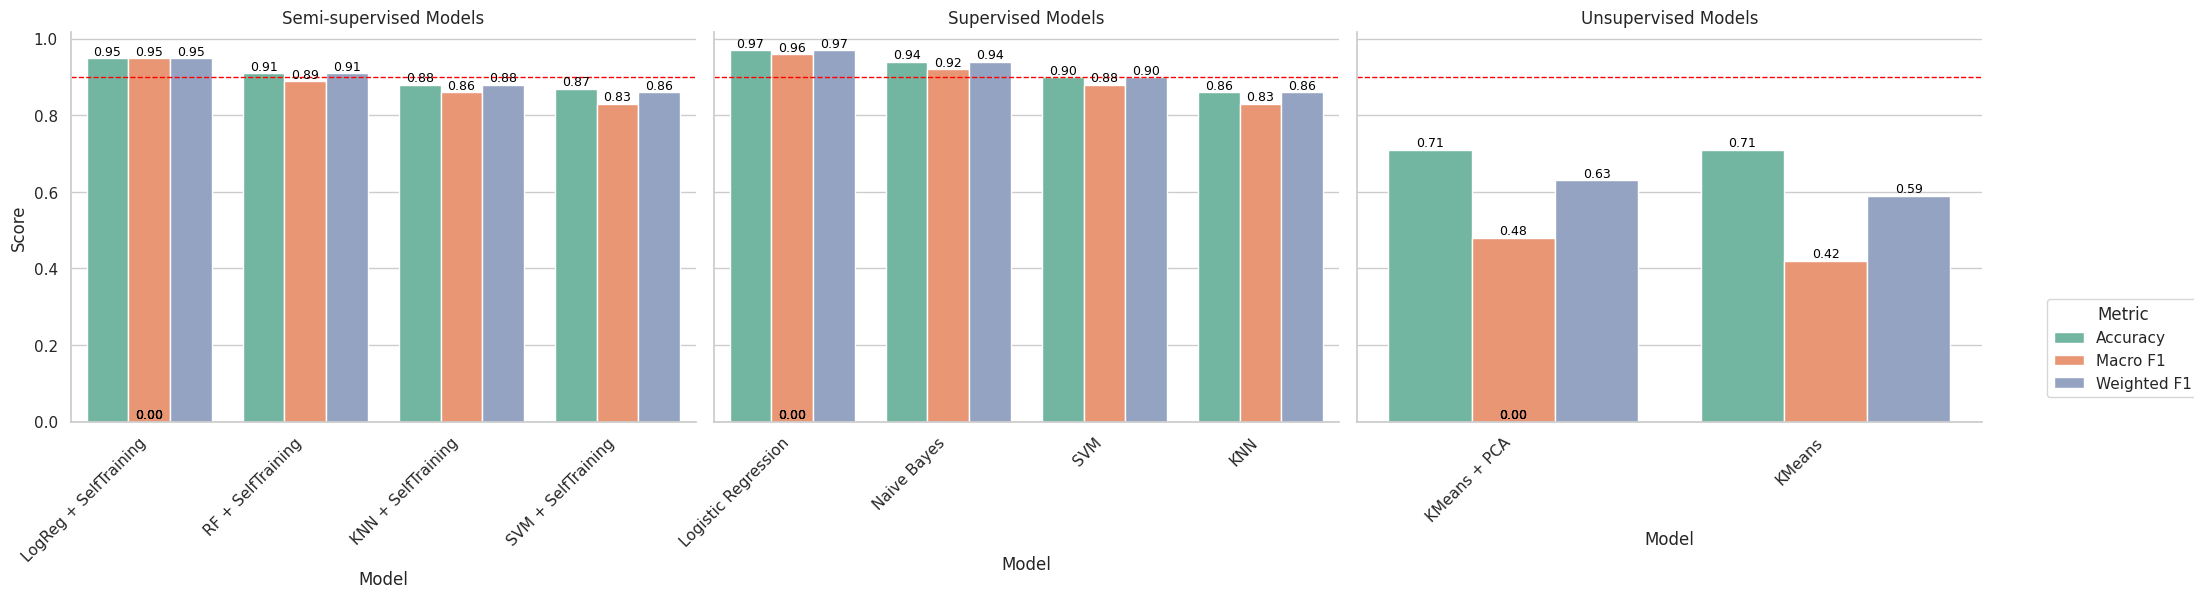

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = {
    "Approach": [
        "Supervised", "Supervised", "Supervised", "Supervised",
        "Unsupervised", "Unsupervised",
        "Semi-supervised", "Semi-supervised", "Semi-supervised", "Semi-supervised"
    ],
    "Model": [
        "Naive Bayes", "KNN", "Logistic Regression", "SVM",
        "KMeans", "KMeans + PCA",
        "KNN + SelfTraining", "LogReg + SelfTraining", "SVM + SelfTraining", "RF + SelfTraining"
    ],
    "Accuracy": [0.94, 0.86, 0.97, 0.90, 0.71, 0.71, 0.88, 0.95, 0.87, 0.91],
    "Macro F1": [0.92, 0.83, 0.96, 0.88, 0.42, 0.48, 0.86, 0.95, 0.83, 0.89],
    "Weighted F1": [0.94, 0.86, 0.97, 0.90, 0.59, 0.63, 0.88, 0.95, 0.86, 0.91]
}

df = pd.DataFrame(data)

# Add average score column for sorting
df["Avg Score"] = df[["Accuracy", "Macro F1", "Weighted F1"]].mean(axis=1)

# Sort within each approach by average score
df_sorted = df.sort_values(by=["Approach", "Avg Score"], ascending=[True, False])

# Melt for seaborn
df_melted = df_sorted.melt(id_vars=["Approach", "Model"],
                           value_vars=["Accuracy", "Macro F1", "Weighted F1"],
                           var_name="Metric", value_name="Score")

# Set up the FacetGrid
g = sns.FacetGrid(df_melted, col="Approach", sharex=False, sharey=True, height=5, aspect=1.3)
g.map_dataframe(sns.barplot, x="Model", y="Score", hue="Metric", palette="Set2")

# Add labels and horizontal line
for ax, (approach, sub_df) in zip(g.axes.flatten(), df_sorted.groupby("Approach")):
    ax.axhline(0.90, ls='--', color='red', linewidth=1)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black', rotation=0)

    # Rotate x-axis labels for clarity
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust plot
g.set_axis_labels("Model", "Score")
g.set_titles("{col_name} Models")
g.add_legend(title="Metric")

# Move legend outside
plt.subplots_adjust(right=0.95)
g._legend.set_bbox_to_anchor((1.05, 0.5))
g._legend.set_frame_on(True)

plt.show()
